In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING DATASET

In [583]:
df = pd.read_parquet('train.parquet')

### ANALYYSIS OF DATA

In [584]:
df.head(8)

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
5,2020-12-16,1.682028,5.464213,1.0,2.718282,2.890372,0
6,2020-12-16,1.682028,5.464764,1.0,2.718282,2.890372,0
7,2020-12-16,1.665291,5.459543,1.0,2.718282,2.890372,0


In [585]:
df.tail(8)

,Date,X1,X2,X3,X4,X5,target
1639416,2024-11-26,1.0,5.479472,1.0,1.0,0.0,0
1639417,2024-11-26,1.0,5.481930,1.0,1.0,0.0,0
1639418,2024-11-26,1.0,5.483718,1.0,1.0,0.0,0
1639419,2024-11-26,1.0,5.482346,1.0,1.0,0.0,0
1639420,2024-11-26,1.0,5.486580,1.0,1.0,0.0,0
1639421,2024-11-26,1.0,5.484797,1.0,1.0,0.0,0
1639422,2024-11-26,1.0,5.483551,1.0,1.0,0.0,0
1639423,2024-11-26,1.0,5.482928,1.0,1.0,0.0,0


In [586]:
df.shape

(1639424, 7)

In [587]:
df.columns

Index(['Date', 'X1', 'X2', 'X3', 'X4', 'X5', 'target'], dtype='object')

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1639424 non-null  datetime64[ns]
 1   X1      1639424 non-null  float64       
 2   X2      1639424 non-null  float64       
 3   X3      1639424 non-null  float64       
 4   X4      1639424 non-null  float64       
 5   X5      1639424 non-null  float64       
 6   target  1639424 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 87.6+ MB


In [589]:
df.describe()

,Date,X1,X2,X3,X4,X5
count,1639424,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06
mean,2022-12-03 07:23:43.817145600,1.139258e+00,5.488189e+00,4.110388e+32,2.706323e+29,1.187219e+00
min,2020-12-16 00:00:00,1.000000e+00,5.412539e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2021-12-10 00:00:00,1.049171e+00,5.480597e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2022-11-30 00:00:00,1.105171e+00,5.488979e+00,1.000000e+00,1.000000e+00,6.931472e-01
75%,2023-11-23 00:00:00,1.214096e+00,5.496717e+00,1.000000e+00,2.718282e+00,2.890372e+00
max,2024-12-11 00:00:00,4.014850e+00,5.541852e+00,1.651636e+38,5.540622e+34,3.465736e+00
std,NaN,1.391992e-01,1.342811e-02,2.346156e+35,5.812988e+31,1.304814e+00


## CHECKING FOR MISSING AND DUPLICATED VALUES

In [590]:
df.isna().sum().sum()

0

In [591]:
df.duplicated().sum()

57315

In [592]:
df = df.drop_duplicates()

In [593]:
df_sample = df.sample(20000, random_state=42)

# CHEKING DISTRIBUTION OF FEATURES

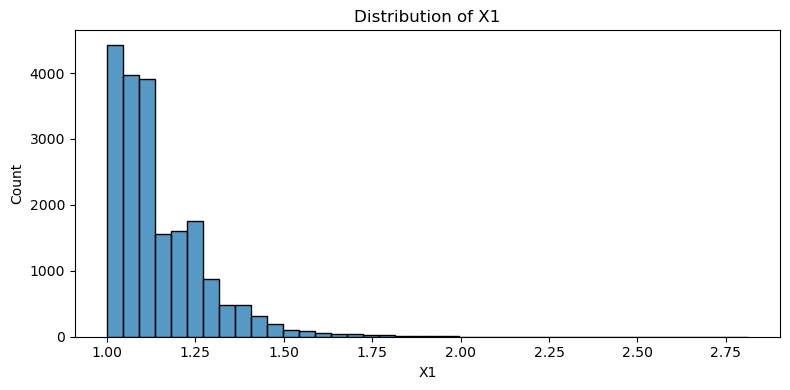

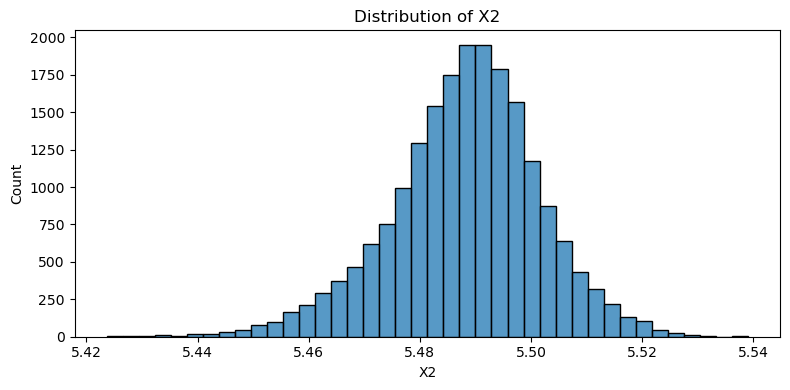

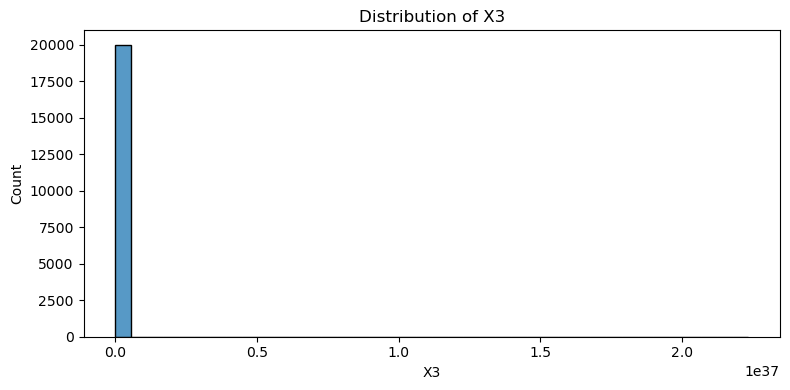

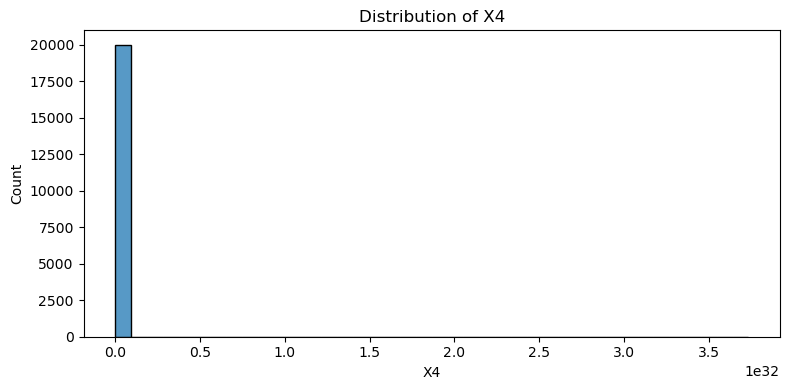

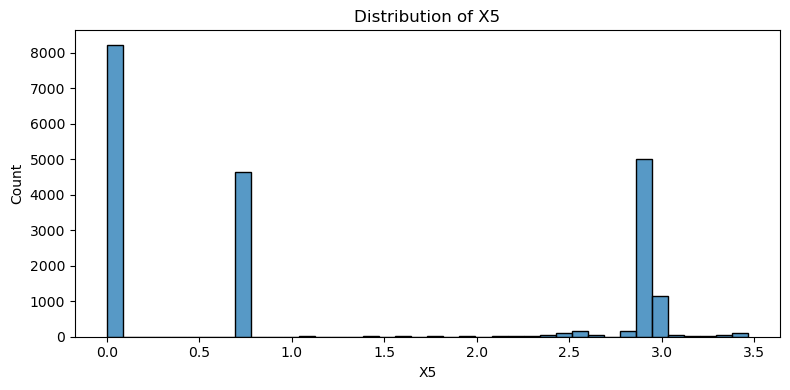

In [594]:
numeric_cols = df_sample.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_sample[col], bins=40)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

### FEATURE ENGINEERING 

## Correlation between features and target

Text(0.5, 1.0, 'Correlation Matrix')

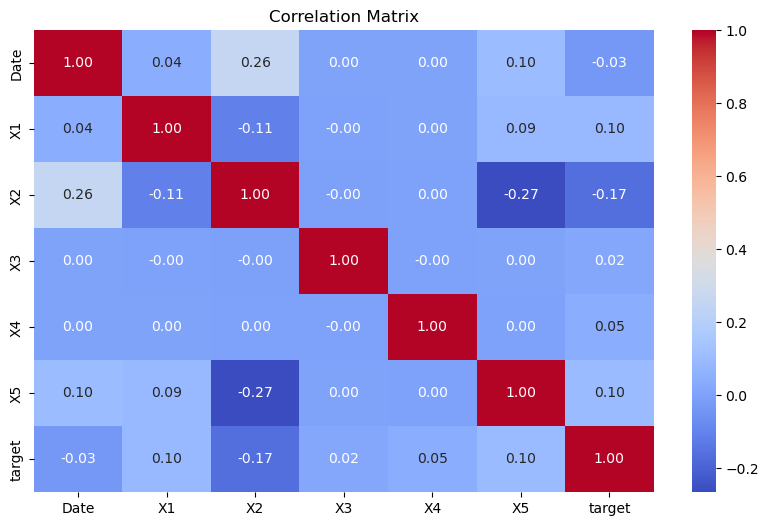

In [595]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

In [596]:
# df["Date"] = pd.to_datetime(df["Date"])

In [597]:
# df["day"] = df["Date"].dt.day
# df["month"] = df["Date"].dt.month
# df["weekday"] = df["Date"].dt.weekday      # 0 = Monday
# df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

In [598]:
df = df.drop(columns=["Date"])

In [599]:
X = df.drop(['target'], axis=1)
y = df['target']

In [600]:
from sklearn.model_selection import train_test_split   

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)    

In [602]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1265687, 5), (316422, 5), (1265687,), (316422,))

In [603]:
X_train.head()

,X1,X2,X3,X4,X5
1188010,1.000000,5.496020,1.0,1.000000,0.693147
686014,1.164160,5.487697,1.0,1.000000,0.693147
1066677,1.382647,5.495158,1.0,7.389056,0.000000
1180097,1.105171,5.493267,1.0,1.000000,0.000000
914884,1.000000,5.473530,1.0,1.000000,2.944439


In [604]:
y_train.value_counts()

target
0    1254461
1      11226
Name: count, dtype: int64

<Axes: xlabel='target'>

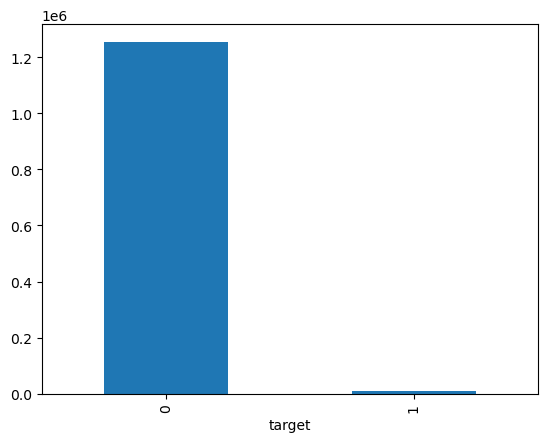

In [605]:
y_train.value_counts().plot(kind='bar')

In [606]:
from sklearn.tree import DecisionTreeClassifier

In [607]:
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')

In [608]:
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [609]:
y_pred =model.predict(X_test)

In [610]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [611]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[311296   2319]
 [  1349   1458]]


In [612]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    313615
           1       0.39      0.52      0.44      2807

    accuracy                           0.99    316422
   macro avg       0.69      0.76      0.72    316422
weighted avg       0.99      0.99      0.99    316422



In [613]:
print('roc auc score:', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

roc auc score: 0.7569436994084763


In [614]:
model.feature_importances_

array([0.06662885, 0.53941228, 0.15860574, 0.20571242, 0.02964071])

### PREPRUNING

In [615]:
model = DecisionTreeClassifier(random_state=42,class_weight='balanced', max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred =model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[291625  21990]
 [   177   2630]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    313615
           1       0.11      0.94      0.19      2807

    accuracy                           0.93    316422
   macro avg       0.55      0.93      0.58    316422
weighted avg       0.99      0.93      0.96    316422



### ROC AUC SCORE INCREASED AFTER PRUNING

In [616]:
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

ROC AUC Score: 0.9789359576431365


### 🔥 Classification Report Interpretation (Fire Alarm System)

This classification report explains how well the model detects **fire events (target = 1)** using electrical device sensor readings.

#### 🔴 Fire Class (1)
- **Recall = 0.94**  
  The model correctly detects **94% of actual fire incidents**.  
  This means the alarm is triggered for almost every real fire, which is critical for safety.

- **False Negatives = 177**  
  Only a small number of fire events are missed, which is acceptable in fire alarm systems.

- **Precision = 0.11**  
  Many alarms are false positives, but false alarms are acceptable compared to missing a real fire.

#### 🔵 No Fire Class (0)
- **Recall = 0.93**  
  The model correctly identifies most non-fire situations.

- Some non-fire cases trigger alarms, which is an intentional trade-off to increase fire detection.

#### ⚠️ Why Accuracy Is Not Reliable
- The dataset is highly imbalanced.
- Fire events are rare.
- Accuracy does not reflect real fire detection performance.

#### ✅ Conclusion
- The model prioritizes **fire detection (high recall)** over precision.
- This behavior is suitable for real-world fire alarm systems where safety is the top priority.


In [617]:
from sklearn.pipeline import Pipeline

In [618]:
fire_pipeline = Pipeline(
    steps=[
        ('model', DecisionTreeClassifier(
            random_state=42,
            class_weight='balanced',
            max_depth=5,
            min_samples_split=10,
            min_samples_leaf=5
        ))
    ]
)


In [619]:
fire_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If flo

In [620]:
y_pred = fire_pipeline.predict(X_test)
y_prob = fire_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[291625  21990]
 [   177   2630]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    313615
           1       0.11      0.94      0.19      2807

    accuracy                           0.93    316422
   macro avg       0.55      0.93      0.58    316422
weighted avg       0.99      0.93      0.96    316422


ROC-AUC Score: 0.9789359576431365


In [621]:
import joblib

In [622]:
joblib.dump(fire_pipeline, "fire_alarm_pipeline.pkl")

['fire_alarm_pipeline.pkl']

In [623]:
fire_pipeline = joblib.load("fire_alarm_pipeline.pkl")


In [624]:
new_df = pd.read_parquet("test.parquet")

In [625]:
X_new = new_df.copy()

In [626]:
X_new.drop(columns=['Date','ID'], inplace=True)


In [627]:
new_df.drop(columns=['Date','ID'], inplace=True)


In [628]:
new_df.head()

,X1,X2,X3,X4,X5
0,1.685395,5.463917,1.0,7.389056,2.890372
1,1.488844,5.454936,1.0,7.389056,2.890372
2,1.164160,5.471136,1.0,1.000000,2.890372
3,1.000000,5.467385,1.0,1.000000,2.890372
4,1.000000,5.453995,1.0,1.000000,2.833213


In [629]:
new_df['fire_prediction'] = fire_pipeline.predict(new_df)


In [630]:
new_df.head()

,X1,X2,X3,X4,X5,fire_prediction
0,1.685395,5.463917,1.0,7.389056,2.890372,1
1,1.488844,5.454936,1.0,7.389056,2.890372,1
2,1.164160,5.471136,1.0,1.000000,2.890372,0
3,1.000000,5.467385,1.0,1.000000,2.890372,1
4,1.000000,5.453995,1.0,1.000000,2.833213,1


In [631]:
fire_prob = fire_pipeline.predict_proba(X_new)[:, 1]

In [632]:
fire_pred = fire_pipeline.predict(X_new)


In [633]:
new_df['fire_prediction'] = fire_pred
new_df['fire_probability'] = fire_prob

In [634]:
new_df.head()

,X1,X2,X3,X4,X5,fire_prediction,fire_probability
0,1.685395,5.463917,1.0,7.389056,2.890372,1,0.528590
1,1.488844,5.454936,1.0,7.389056,2.890372,1,0.528590
2,1.164160,5.471136,1.0,1.000000,2.890372,0,0.291262
3,1.000000,5.467385,1.0,1.000000,2.890372,1,0.528590
4,1.000000,5.453995,1.0,1.000000,2.833213,1,0.528590


In [635]:
new_df['fire_prediction'].value_counts()

fire_prediction
0    379044
1     30812
Name: count, dtype: int64

<Axes: xlabel='fire_prediction'>

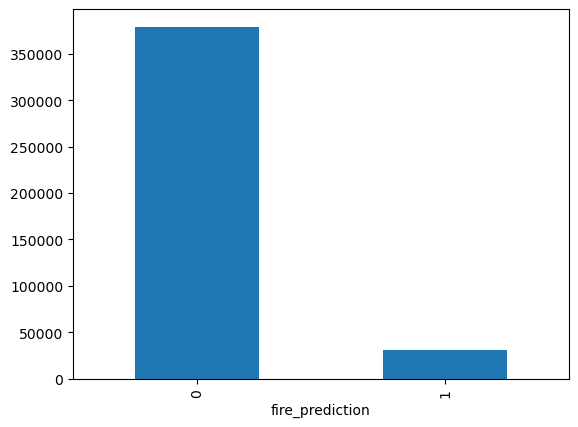

In [636]:
new_df['fire_prediction'].value_counts().plot(kind='bar')